# 1D Chain Model

In this notebook, we begin to investigate the Anderson model through the simulation of the d= 1
 case.

In [21]:
# Init a 2D periodic lattice of n^2 atoms:
import numpy as np

n = 10
chain = np.zeros((n, n))

In [22]:
#chain: physical model
# epsilon is the control parameter for randomness
# T controls the hopping

import networkx as nx

def _hamiltonian(chain, epsilon, T):
    H = epsilon * np.identity((len(chain))**2)
    G = nx.grid_graph(dim = (n, n), periodic=True)
    A = nx.to_numpy_array(G)
    H -= T * A
    
    return H



The Hamiltonian is given by:

$$\hat{H} = \epsilon_0 \delta_{n, m} - t (\delta_{n+1, m} + \delta_{n-1, m})$$

In [23]:
H = _hamiltonian(chain, 0, 1)

In [24]:
# Found the eigenvalues and eigenvectors of the Hamiltonian (energies, and energy eigenstates)
np.linalg.eigh(H)

(array([-4.00000000e+00, -3.61803399e+00, -3.61803399e+00, -3.61803399e+00,
        -3.61803399e+00, -3.23606798e+00, -3.23606798e+00, -3.23606798e+00,
        -3.23606798e+00, -2.61803399e+00, -2.61803399e+00, -2.61803399e+00,
        -2.61803399e+00, -2.23606798e+00, -2.23606798e+00, -2.23606798e+00,
        -2.23606798e+00, -2.23606798e+00, -2.23606798e+00, -2.23606798e+00,
        -2.23606798e+00, -1.38196601e+00, -1.38196601e+00, -1.38196601e+00,
        -1.38196601e+00, -1.23606798e+00, -1.23606798e+00, -1.23606798e+00,
        -1.23606798e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -3.81966011e-01, -3.81966011e-01, -3.81966011e-01,
        -3.81966011e-01, -2.45230759e-15, -1.60304537e-15, -1.55945670e-15,
        -1.15316389e-15, -9.37141843e-16, -6.06627582e-16, -4.49198734e-16,
        -1.66451151e-16, -1.06816011e-16, -2.85845587e-17,  1.62260505e-17,
         4.7

In [25]:
# Assume that the initial state is the ground state.
from scipy.linalg import expm
def __time_evolution(H, t):
    return expm(-1j * H * t)

psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

In [26]:
end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)

0.9999999999999996

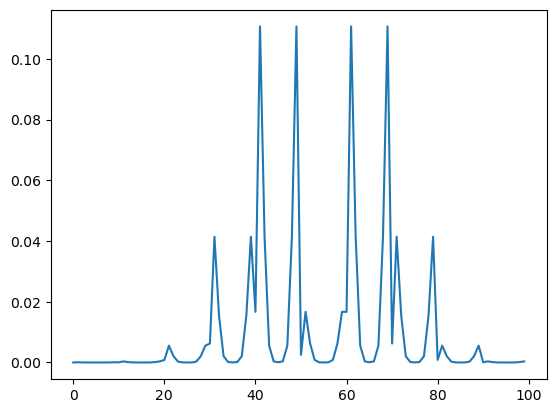

In [27]:
import matplotlib.pyplot as plt

#plt.plot(history[1].T.conj() @ history[1])
density = np.real(np.multiply(history[1].conj(), history[1]))
plt.plot(density)
sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

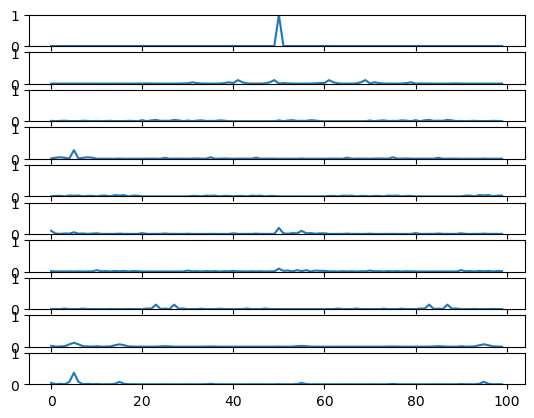

In [29]:
fig, axs = plt.subplots(10)
for i, ax in enumerate(axs):
    density = np.real(np.multiply(history[i].conj(), history[i]))
    ax.plot(density)
    ax.set_ylim(0, 1)
    sum(density)

#So this was for the nonlocalized part

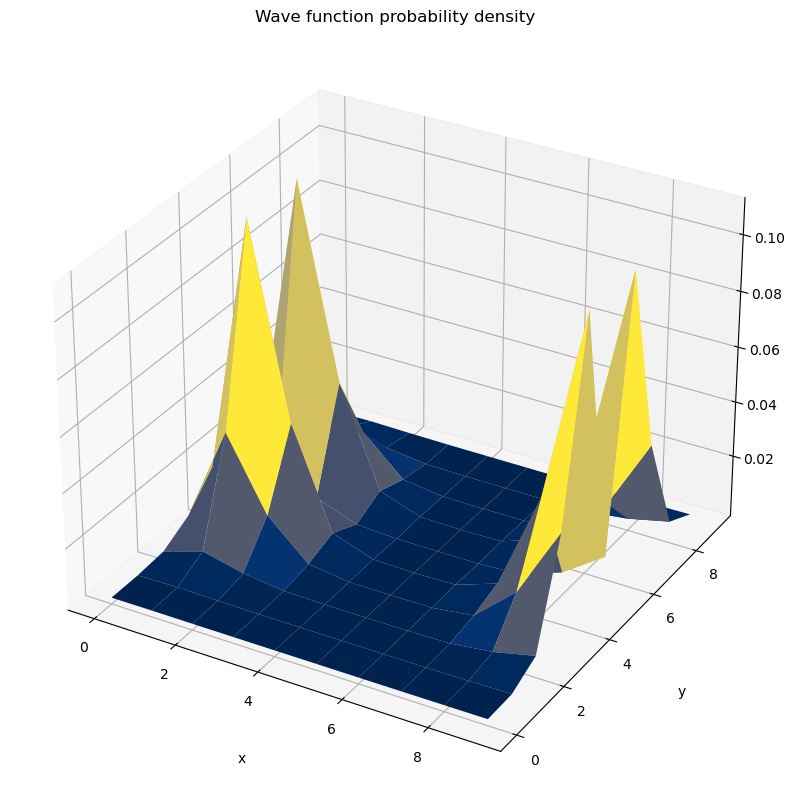

In [65]:
#Add some epsilon randomness in there
eps = 100

H = _hamiltonian(chain, eps, 1)

psi_0 = np.zeros(n**2)
psi_0[n**2//2] = 1

end_time = 10
history = []
for step in range(end_time):
    psi_t = __time_evolution(H, step) @ psi_0
    history.append(psi_t)


density = np.real(np.multiply(history[1].conj(), history[1]))
dens2d = np.reshape(density, (n, n))



fig = plt.figure(figsize = (12,10))

ax = plt.axes(projection='3d')
x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, dens2d, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('P', labelpad=20)
ax.set_title("Wave function probability density")

#fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()




#plt.plot(dens2d)
#sum(density)
#for wavefunction in history:
#    plt.plot(np.linalg.norm(wavefunction))

#fig, axs = plt.subplots(10)
#for i, ax in enumerate(axs):
    #density = np.real(np.multiply(history[i].conj(), history[i]))
    #ax.plot(density)
    #ax.set_ylim(0, 1)
    #sum(density)


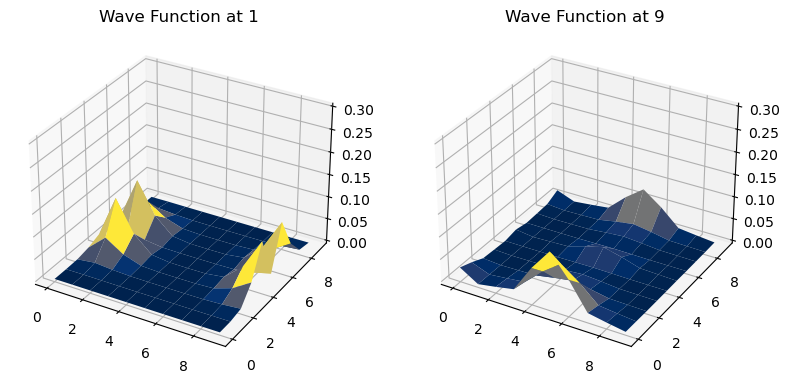

In [74]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
dens1 = (np.real(np.multiply(history[1].conj(), history[1]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens1, cmap=plt.cm.cividis)
ax.set_zlim(0, 0.3)
ax.set_title("Wave Function at 1")

ax = fig.add_subplot(1, 2, 2, projection='3d')
dens2 = (np.real(np.multiply(history[8].conj(), history[8]))).reshape((n, n))
surf = ax.plot_surface(X, Y, dens2, cmap=plt.cm.cividis)
ax.set_zlim(0, 0.3)
ax.set_title("Wave Function at 9")

plt.show()